<h1><center>Covid-19 Data Analysis </center></h1>
<p>HIPOTESIS: Se tiene una relación directa entre el número de infectados por Sars-Cov2 a nivel Mundial y un informe de la felicidad del Mundo</p>

<h3>Modulos a usarse</h3>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Modulos importados.")

Modulos importados.


<h2>IMPORTANDO DATASET</h2>

In [3]:
corona_data_set = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
corona_data_set.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91


<h3>Información del dataframe</h3>

In [15]:
corona_data_set.shape

(266, 142)

<h3>Borrando las columnas que no se usaran</h3>

In [4]:
corona_data_set.drop(["Lat","Long"],axis=1,inplace=True)
corona_data_set.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,NaN,Albania,0,0,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,NaN,Angola,0,0,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91


<h3>Sumando ciudadades o provincias de cada país</h3>

In [144]:
corona_dataset_aggreageted = corona_data_set.groupby("Country/Region").sum()

In [6]:
corona_dataset_aggreageted.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
Albania,0,0,0,0,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
Algeria,0,0,0,0,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
Andorra,0,0,0,0,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
Angola,0,0,0,0,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91


In [7]:
corona_dataset_aggreageted.shape

(188, 138)

<h2>VISUALIZAR DATOS<h2>

<h3>Gráfico de datos acumulados de casos confirmados por ejemplo China</h3>

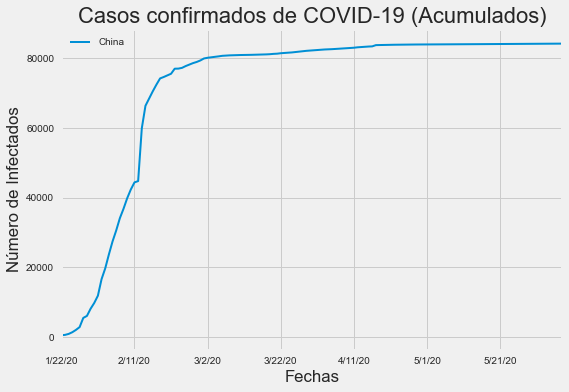

In [115]:
corona_dataset_aggreageted.loc["China"].plot(linewidth = 2)
plt.xlabel("Fechas")
plt.ylabel("Número de Infectados")
plt.title("Casos confirmados de COVID-19 (Acumulados)", fontsize = 22)
plt.legend()
plt.style.use("fivethirtyeight")

<h4>Escala Logaritmica</h4>

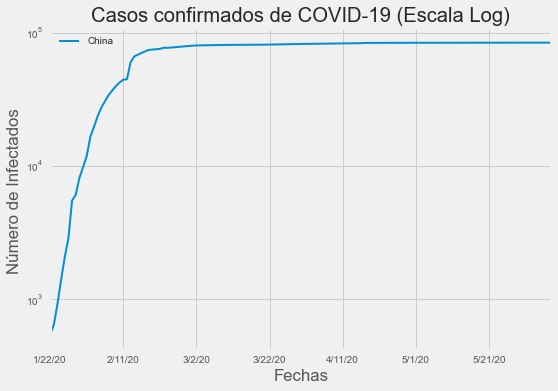

In [127]:
corona_dataset_aggreageted.loc["China"].plot(linewidth = 2)
plt.yscale("log")
plt.xlabel("Fechas")
plt.ylabel("Número de Infectados ")
plt.title("Casos confirmados de COVID-19 (Escala Log)")
plt.legend()

<h2>CALCULANDO UNA BUENA MEDIDA</h2>
<p>Necesitamos una buena medida representada como un número, que describa la propagación del virus en un país</p>

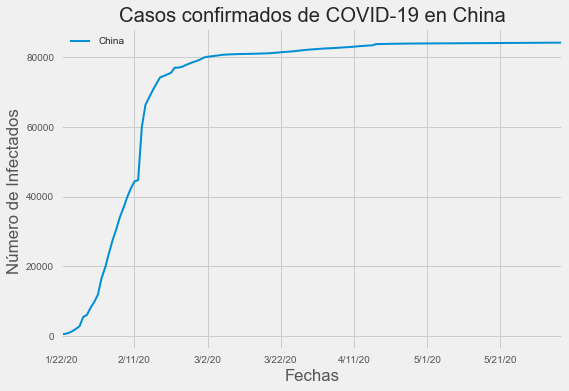

In [126]:
corona_dataset_aggreageted.loc["China"].plot(linewidth = 2)
plt.xlabel("Fechas")
plt.ylabel("Número de Infectados ")
plt.title("Casos confirmados de COVID-19 en China")
plt.legend()

<h4>Calculamos los infectados para los primeros tres días</h4>

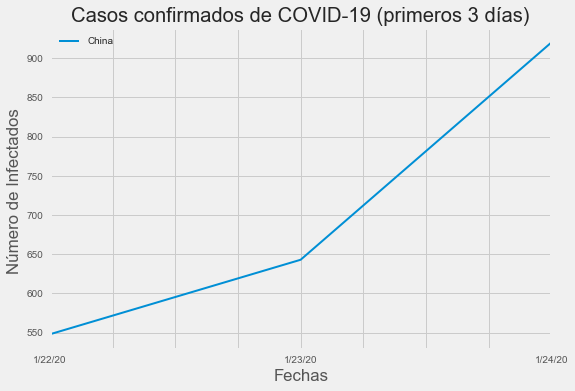

In [125]:
corona_dataset_aggreageted.loc["China"][:3].plot(linewidth = 2)
plt.xlabel("Fechas")
plt.ylabel("Número de Infectados ")
plt.title("Casos confirmados de COVID-19 (primeros 3 días)")
plt.legend()

<h3>Calculando la primera derivada de la curva</h3>
<p>Calculamos la tasa de infección día a día en nuestro periodo</p>
<p>La tasa de incidencia se define como el número de casos nuevos de una enfermedad u otra condición de salud dividido por la población en riesgo de la enfermedad (población expuesta) en un lugar específico y durante un período especifico.</p>

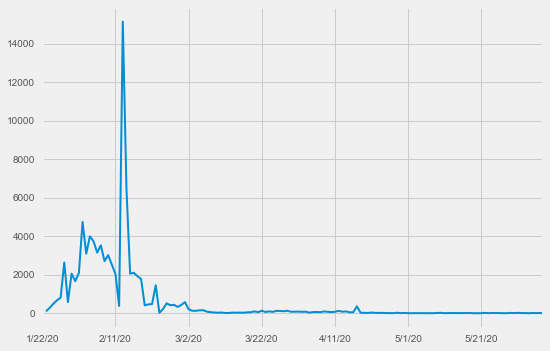

In [130]:
#con la derivada encontramos la tasa de esta curva
corona_dataset_aggreageted.loc["China"].diff().plot(linewidth = 2)

<h3>Encontrar la tasa de infección máxima para china, Italia y España</h3>

In [134]:
corona_dataset_aggreageted.loc["China"].diff().max()

15136.0

In [137]:
corona_dataset_aggreageted.loc["Italy"].diff().max()

6557.0

In [138]:
corona_dataset_aggreageted.loc["Spain"].diff().max()

9630.0

<p>Nos menciona que en 24 hrs se registraron 15136, 6557 y 9630 casos de infección de COVID-19 en los respectivos paises</p>

<h3>Encontrar la máxima infección para todos los paises</h3>

In [145]:
countries = list(corona_dataset_aggreageted.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggreageted.loc[c].diff().sum())
corona_dataset_aggreageted["max_infection_rate"] = max_infection_rates

In [146]:
corona_dataset_aggreageted.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20342.0
Albania,0,0,0,0,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1246.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10154.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852.0
Angola,0,0,0,0,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,91.0


<h3>Crearemos un nuevo data frame solo con las columnas que necesitaremos</h3>

In [148]:
corona_data = pd.DataFrame(corona_dataset_aggreageted["max_infection_rate"])

In [149]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,20342.0
Albania,1246.0
Algeria,10154.0
Andorra,852.0
Angola,91.0


<h2>INFORME DE LA FELICIDAD DEL MUNDO</h2>
<ul>
   <li>Importar el dataset</li>
   <li>Seleccionar las columnas que se necesitará para nuestro analisis</li>
   <li>Uniserse al conjunto de datos</li>
   <li>Calcular las correlaciones como el resultado de nuestro propio analisis</li>
</ul>

<h3>Imporando el dataset</h3>

In [153]:
happiness_report_csv = pd.read_csv("a:/GitHub/Proyectos/covid19/Data happiness/worldwide_happiness_report.csv") 
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<h3>Saquemos las columnas que no necesitaremos</h3>

In [154]:
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]
happiness_report_csv.drop(useless_cols, axis = 1, inplace = True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


<h3>Cambiando el index del dataframe</h3>

In [155]:
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


<h3>Ahora vamos a unir dos conjuntos de datos que hemos preparado</h3>

In [156]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,20342.0
Albania,1246.0
Algeria,10154.0
Andorra,852.0
Angola,91.0


In [157]:
corona_data.shape

(188, 1)

<h4>world happiness report dataset</h4>

In [158]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [159]:
happiness_report_csv.shape

(156, 4)

<h4>Unimos los datasets internamente</h4>

In [162]:
data = corona_data.join(happiness_report_csv, how="inner")
data

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,20342.0,0.350,0.517,0.361,0.000
Albania,1246.0,0.947,0.848,0.874,0.383
Algeria,10154.0,1.002,1.160,0.785,0.086
Argentina,22794.0,1.092,1.432,0.881,0.471
Armenia,13130.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,2377.0,0.960,1.427,0.805,0.154
Vietnam,331.0,0.741,1.346,0.851,0.543
Yemen,484.0,0.287,1.163,0.463,0.143
Zambia,1089.0,0.578,1.058,0.426,0.431


<h3>Matrix de correlación</h3>
<p>Veremos si existe alguna relación entre las columnas de vida diferente "Healthy life expectancy" y "max_infection_rate</p>

In [164]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.242295,0.175766,0.209635,0.029202
GDP per capita,0.242295,1.000000,0.757521,0.859431,0.394799
Social support,0.175766,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.209635,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.029202,0.394799,0.456317,0.423146,1.000000


<h2>VISUALIZANDO LOS RESULTADOS</h2>

In [166]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,20342.0,0.350,0.517,0.361,0.000
Albania,1246.0,0.947,0.848,0.874,0.383
Algeria,10154.0,1.002,1.160,0.785,0.086
Argentina,22794.0,1.092,1.432,0.881,0.471
Armenia,13130.0,0.850,1.055,0.815,0.283


<h3>Plotting GDP vs maximum infection rate</h3>

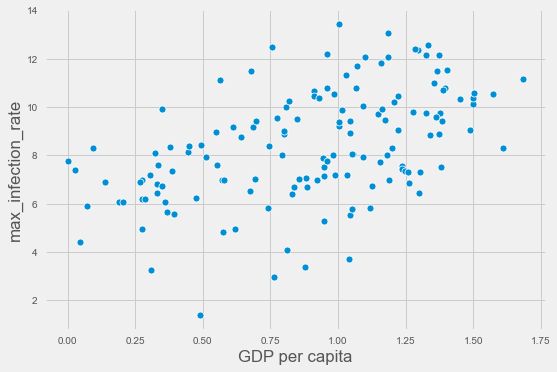

In [168]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

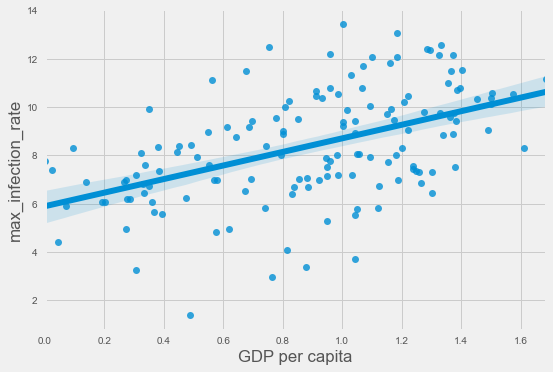

In [171]:
sns.regplot(x,np.log(y))

<h3>Plotting social support vs ,maximum infection rate</h3>

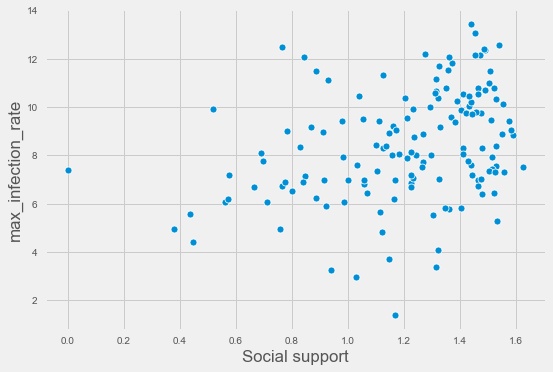

In [172]:
sns.scatterplot(data["Social support"],np.log(data["max_infection_rate"]))

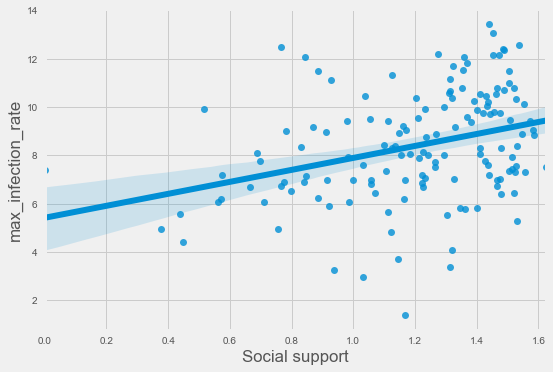

In [173]:
sns.regplot(data["Social support"],np.log(data["max_infection_rate"]))

<h3>PLotting healthy life expectancy vs maximum infection rate</h3>

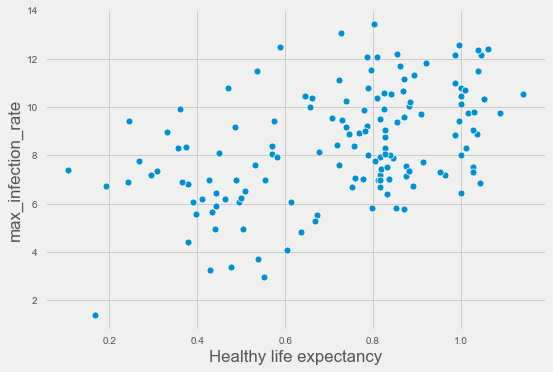

In [174]:
sns.scatterplot(data["Healthy life expectancy"],np.log(data["max_infection_rate"]))

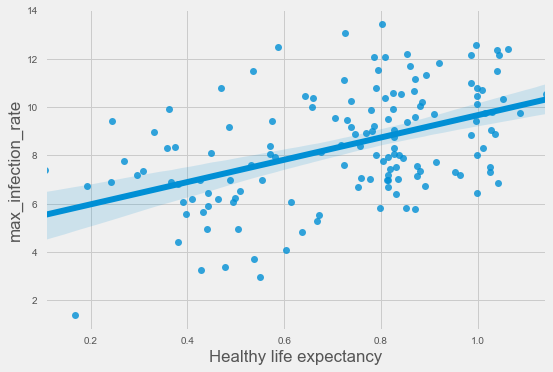

In [175]:
sns.regplot(data["Healthy life expectancy"],np.log(data["max_infection_rate"]))